In [ ]:
pip install rasterio

     |████████████████████████████████| 18.2MB 227kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AG_jNIkYlboHmDKxrvS8IIdJo-2ktdqr2wKYtIN8nuH-vVFscxpURM
Mounted at /content/gdrive


In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Moisture")

FileNotFoundError: ignored

In [ ]:
from matplotlib import pyplot as plt
import sys
import numpy as np

In [ ]:
import rasterio
from rasterio import plot

In [ ]:
from osgeo import gdal

In [ ]:
b8a = gdal.Open('2020-07-03 00_00 - 2020-07-03 23_59, Sentinel-2 S2L2A, B08 (Raw).tiff')
b4 = gdal.Open('2020-07-03 00_00 - 2020-07-03 23_59, Sentinel-2 S2L2A, B04 (Raw).tiff')

In [ ]:
b11 = gdal.Open('2020-07-03 00_00 - 2020-07-03 23_59, Sentinel-2 S2L2A, B11 (Raw).tiff')
b8a = gdal.Open('2020-07-03 00_00 - 2020-07-03 23_59, Sentinel-2 S2L2A, B8A (Raw).tiff')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f3a3ff22cc0> >

In [ ]:
d8a = b8a.GetRasterBand(1)
d4 = b4.GetRasterBand(1)
img_8a = d8a.ReadAsArray()
img_4 = d4.ReadAsArray()

In [ ]:
ndvi = (img_8a - img_4) / (img_8a + img_4)

In [ ]:
d8a = b8a.GetRasterBand(1)
d11 = b11.GetRasterBand(1)
img_8a = d8a.ReadAsArray()
img_11 = d11.ReadAsArray()

In [ ]:
moisture = (img_8a - img_11) / (img_8a + img_11)

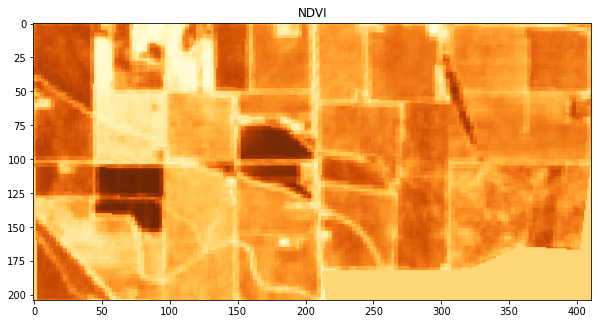

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(moisture, cmap='YlOrBr') # Typically the color map for NDVI maps are the Red to Yellow to Green
plt.title('NDVI')
plt.show()

In [ ]:
moisture

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [ ]:
img_8a

array([[0.3106, 0.3758, 0.3758, ..., 1.    , 1.    , 1.    ],
       [0.3494, 0.427 , 0.427 , ..., 0.1147, 0.1147, 0.1147],
       [0.3494, 0.427 , 0.427 , ..., 0.1147, 0.1147, 0.1147],
       ...,
       [1.    , 1.    , 1.    , ..., 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , ..., 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , ..., 1.    , 1.    , 1.    ]],
      dtype=float32)

In [ ]:
pip install sentinelhub

     |████████████████████████████████| 184kB 2.6MB/s 
     |████████████████████████████████| 10.9MB 360kB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.0.5-cp36-none-any.whl size=187743 sha256=4ca1033fe6837a251824c62a05f4137d62573f9e6b38a2c95a361c316f0ab925
  Stored in directory: /root/.cache/pip/wheels/26/7a/9b/05e508fb080ef7e27da59f68e3cceb895807df3788bc07a88a
  Created wheel for utm: filename=utm-0.6.0-cp36-none-any.whl size=6095 sha256=0f596b8ec35b018dec6b4d43c33886af6c454e284a0488de30be008f1eede326
  Stored in directory: /root/.cache/pip/wheels/9a/76/b2/58ad7ade8b0475c577f80ee8023d7164fd561bb45c20b4beab
Successfully built sentinelhub utm


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime
import numpy as np

import matplotlib.pyplot as plt
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox
from sentinelhub import CustomUrlParam

In [ ]:
INSTANCE_ID = '4e90288f-9ccd-4841-9ae5-db857a41c493'

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import datetime
import numpy as np

import matplotlib.pyplot as plt
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

from sentinelhub import CustomUrlParam


# Tip: if you want to insert the coordinates from google, you will need to set
# the first two coordinates for the upper left corner (-122.41, 39.31)
# and second two (-122.75, 39.55) will refer to lower right corner of the box
# Lastly: lat long from Google maps needs to be switched around (e.g. for lower corner 
# google maps will give you '39.55, -122.75'; you need to switch out around to read -122.75, 39.55)

betsiboka_coords_wgs84 = [-122.41, 39.31, -122.75, 39.55]
betsiboka_bbox2 = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)


my_url = 'https://github.com/sentinel-hub/custom-scripts/blob/master/sentinel-3/ndbi/script.js'


evalscripturl_wms_request = WmsRequest(layer='NDVI', # Layer parameter can be any existing layer
                                       bbox=betsiboka_bbox2,
                                       time='2019-08-28',
                                       width=512,
                                       instance_id=INSTANCE_ID,)

evalscripturl_wms_data = evalscripturl_wms_request.get_data()
plot_image(evalscripturl_wms_data[0])

/usr/local/lib/python3.6/dist-packages/sentinelhub/data_request.py:47: SHDeprecationWarning: Parameter 'instance_id' is deprecated and will soon removed. Use parameter 'config' instead
  category=SHDeprecationWarning)


DownloadFailedException: ignored

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)


In [ ]:
betsiboka_coords_wgs84 = [46.16, -16.15, 46.51, -15.58]
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

In [ ]:
wms_bands_request = WmsRequest(
    layer='BANDS-S2-L1C',
    bbox=betsiboka_bbox,
    time='2017-12-15',
    width=512,
    height=856,
    image_format=MimeType.TIFF_d32f,
    config=INSTANCE_ID
)

wms_bands_img = wms_bands_request.get_data()

AttributeError: ignored

In [2]:
pip install sentinelhub

     |████████████████████████████████| 184kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 8.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.0.5-cp36-none-any.whl size=187743 sha256=e46f91457e18a26381c60db2c52a3bde9b39c0946e22932f441555a816161690
  Stored in directory: /root/.cache/pip/wheels/26/7a/9b/05e508fb080ef7e27da59f68e3cceb895807df3788bc07a88a
  Created wheel for utm: filename=utm-0.6.0-cp36-none-any.whl size=6095 sha256=af40ab552a866d0a5ad4a344ced5a6bf02fad0c9bf2a1d0f05b492eccfc07d52
  Stored in directory: /root/.cache/pip/wheels/9a/76/b2/58ad7ade8b0475c577f80ee8023d7164fd561bb45c20b4beab
Successfully built sentinelhub utm


In [9]:
#Start 
from sentinelhub import SHConfig


INSTANCE_ID = '74b3a3d5-14d7-4af0-b08c-d579e0ff2c21'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [10]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [5]:
import datetime
import numpy as np

import matplotlib.pyplot as plt

In [6]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox , Geometry,CustomUrlParam
from shapely.geometry import Polygon

In [19]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)



In [25]:

betsiboka_coords_wgs84 = [46.16, -16.15, 47.01, -15.58]


chico_coords_wgs84 = [-122.194405, 39.624598, -122.117157, 39.583069]
betsiboka_coords_wgs84 = [80.209067, 21.369876, 80.215933, 21.359038]
betsiboka_coords_wgs84 = [46.16, -16.15, 47.01, -15.58]
betsiboka_coords_wgs84 = [-122.194405, 39.624598, -122.117157, 39.583069]
#betsiboka_coords_wgs84 = [1292344.0 ,5205055.5 ,1310615.0 ,5205055.5]

In [26]:
betsiboka_bbox = BBox(bbox=betsiboka_coords_wgs84, crs=CRS.WGS84)

In [ ]:
#For Images 
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

wms_true_color_request = WmsRequest(
    layer='TRUE-COLOR-S2-L1C',
    bbox=betsiboka_bbox,
    time=('2017-12-01', '2017-12-31'),
    width=512, height=856,
    maxcc=0.3,
    config=config 
)



In [ ]:
wms_true_color_img = wms_true_color_request.get_data()

In [ ]:
print('Returned data is of type = %s and length %d.' % (type(wms_true_color_request ), len(wms_true_color_img)))

Returned data is of type = <class 'sentinelhub.data_request.WmsRequest'> and length 3.


In [ ]:
print('Single element in the list is of type {} and has shape {}'.format(type(wms_true_color_img[-1]),
                                                                         wms_true_color_img[-1].shape))

Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 4)


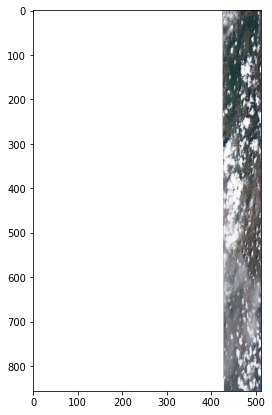

In [ ]:
plot_image(wms_true_color_img[-1])

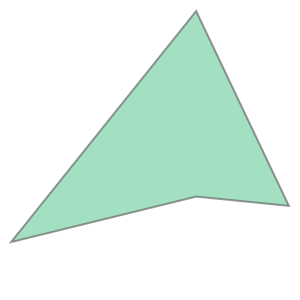

In [ ]:
a=Polygon([(-5.13, 48), (-5.23, 48.09), (-5.13, 48.17),(-5.03, 48.08),(-5.13, 48)])
Polygon([(1, 2), (400, 500), (600, 80), (400, 100),(1, 2)])

In [44]:
#Tiff file output 
wms_bands_request = WcsRequest(
    layer='BANDS-S2-L1C',
    bbox=betsiboka_bbox,
    time='latest',
    resx='10m',
    resy='10m',
    maxcc=0.1,
    image_format=MimeType.TIFF_d32f,
    config=config,
    custom_url_params={
        CustomUrlParam.GEOMETRY: "POLYGON((13.522606 -86.160791,13.522462 -86.160989,13.522387 -86.161045,13.522316 -86.161049,13.522236 -86.16109,13.522079 -86.161024,13.521843 -86.161166,13.521601 -86.161072,13.521576 -86.161009,13.52146 -86.16105,13.521368 -86.160921,13.521312 -86.160904,13.521313 -86.160778,13.521438 -86.160657,13.521674 -86.160649,13.521895 -86.160569,13.522006 -86.160512,13.522087 -86.160532,13.522288 -86.1606,13.522346 -86.160557,13.522391 -86.160526,13.522522 -86.160499,13.522622 -86.160463,13.522696 -86.160418,13.522643 -86.160602,13.522608 -86.160696,13.522606 -86.160791))"
    }
)


wms_bands_img = wms_bands_request.get_data()

In [43]:
wms_bands_img[0].shape

(462, 662, 14)

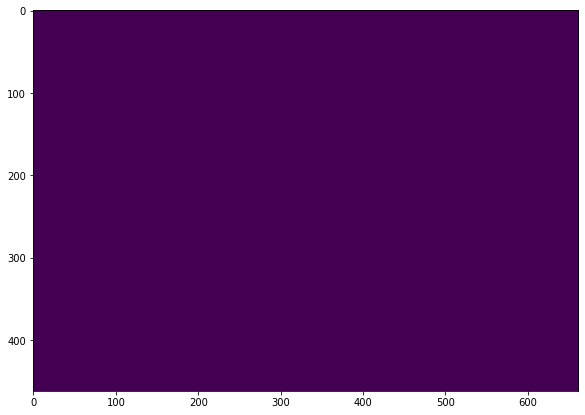

In [39]:
plot_image(wms_bands_img[-1][:, :, 0])

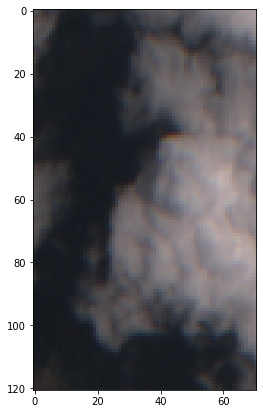

In [ ]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]])

In [29]:
#ndvi  = (wms_bands_img[-1][:, :, 7] - wms_bands_img[-1][:, :, 3])/(wms_bands_img[-1][:, :, 7] + wms_bands_img[-1][:, :, 3])
#ndvi = np.where(ndvi == np.nan, -99, ndvi)

In [30]:
red = np.array(wms_bands_img[-1][:, :, 3])
nir = np.array(wms_bands_img[-1][:, :, 7])
ndvi = np.divide(np.subtract(red, nir), np.add(red, nir))


In [31]:
import numpy as np 
b = np.where(np.isnan(ndvi), 0, ndvi)

In [32]:
b

array([[-0.1923697 , -0.14246722, -0.16280258, ..., -0.0968581 ,
        -0.0949353 , -0.09469025],
       [-0.32844734, -0.17732792, -0.1460446 , ..., -0.09741809,
        -0.09725906, -0.09167778],
       [-0.2167422 , -0.14269565, -0.1483906 , ..., -0.09036144,
        -0.09596841, -0.09684586],
       ...,
       [-0.04835861, -0.08767472, -0.13148679, ..., -0.4002737 ,
        -0.36836854, -0.27375323],
       [-0.05140507, -0.11289826, -0.14633341, ..., -0.40139288,
        -0.3675955 , -0.27614832],
       [-0.06812738, -0.09487727, -0.15254238, ..., -0.41133767,
        -0.34823215, -0.26916024]], dtype=float32)

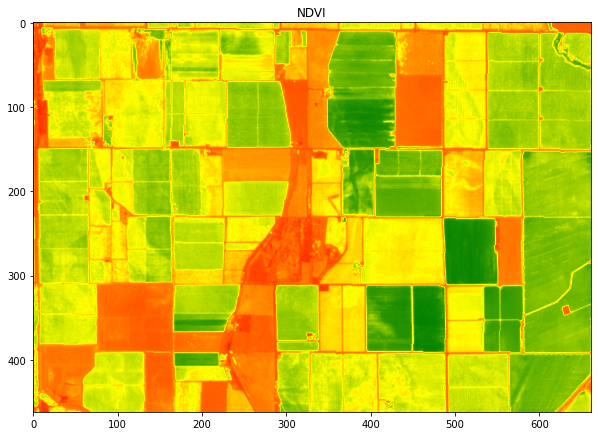

In [33]:
import matplotlib 
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.imshow(b, cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["green","yellow","red"])) # Typically the color map for NDVI maps are the Red to Yellow to Green
plt.title('NDVI')
plt.show()

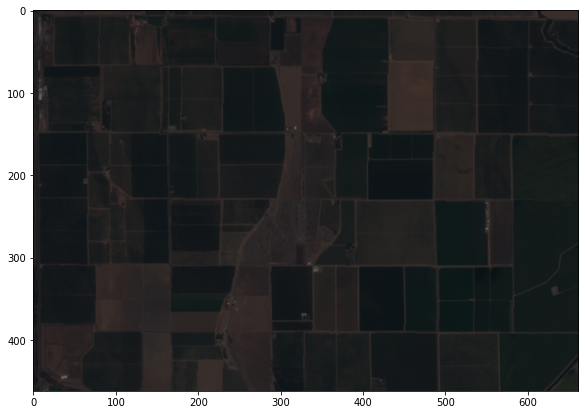

In [ ]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]])

In [ ]:
custom_url_params={
        CustomUrlParam.GEOMETRY: "POLYGON((1292344.0 5205055.5, 1301479.5 5195920.0, 1310615.0 5205055.5, 1301479.5 5214191.0, 1292344.0 5205055.5))"
    }